In [2]:
print(data.columns)


Index(['Graph', 'Category', 'speedup over PKC', 'speedup over ParK',
       'speedup over GBBS', 'Ours', 'maxCore', 'ours'],
      dtype='object')


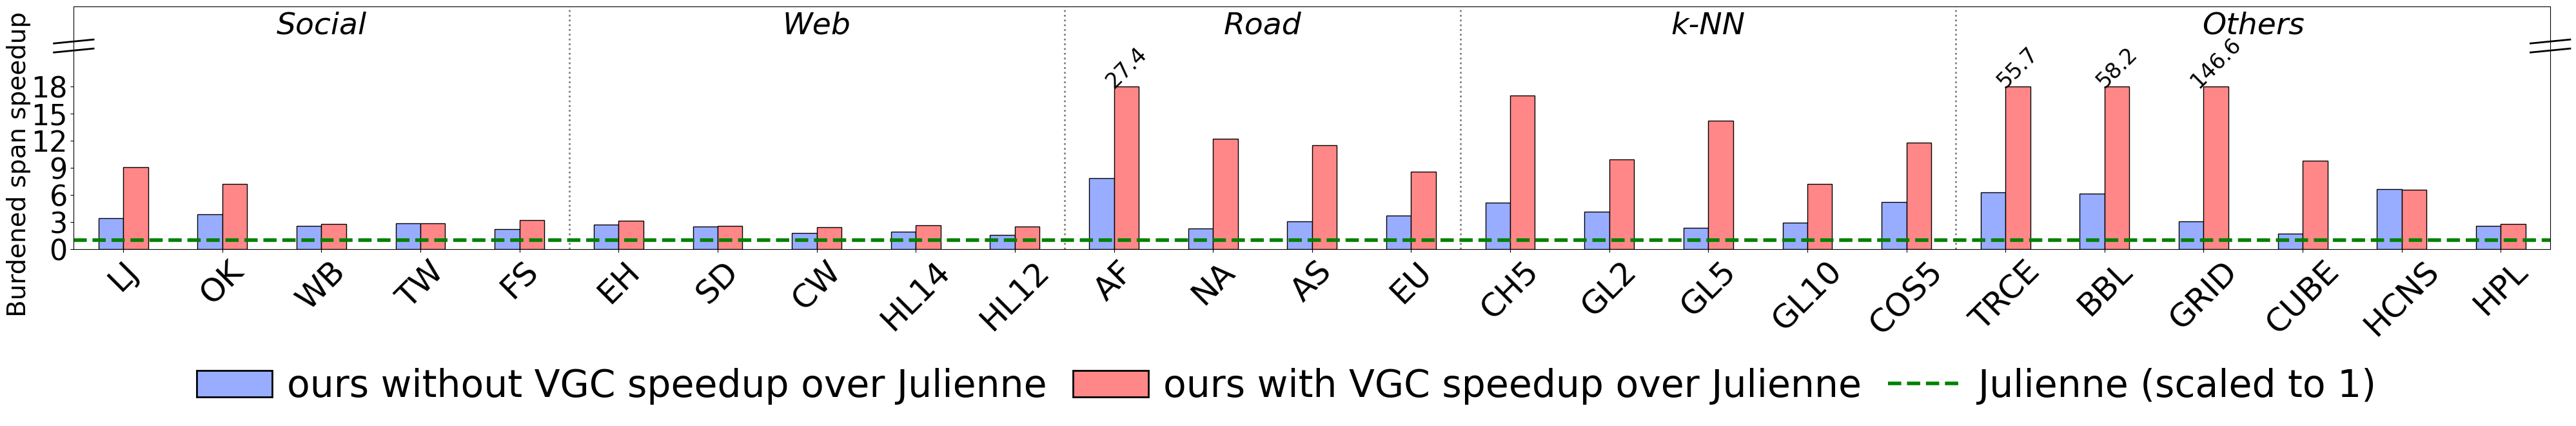

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

file_path = './../../tables/span.csv'
data = pd.read_csv(file_path, keep_default_na=False)
data.columns = data.columns.str.strip()

data['NVGC ratio'] = pd.to_numeric(data['NVGC ratio'], errors='coerce')
data['VGC ratio'] = pd.to_numeric(data['VGC ratio'], errors='coerce')
data['GBBS'] = pd.to_numeric(data['GBBS'], errors='coerce')

categories = data['Category'].unique()

palette = ["#98ADFF", "#FF8787"]

fig, ax = plt.subplots(figsize=(40, 5.5))  # Single figure

def plot_bars(ax, data_subset):
    index = 0
    bar_width = 0.25
    category_positions = []
    
    ax.set_ylim([0, 26.9])  # Adjust the y-limit as needed
    subset_categories = data_subset['Category'].unique()
    
    for category in subset_categories:
        subset = data_subset[data_subset['Category'] == category]
        category_index = np.arange(len(subset)) + index

        limited_NVGC = subset['NVGC ratio'].apply(lambda x: min(x, 18) if pd.notna(x) else x)
        limited_VGC = subset['VGC ratio'].apply(lambda x: min(x, 18) if pd.notna(x) else x)

        bars1 = ax.bar(category_index - 0.5 * bar_width, limited_NVGC, bar_width, label='NVGC ratio', color=palette[0], edgecolor='black')
        bars2 = ax.bar(category_index + 0.5 * bar_width, limited_VGC, bar_width, label='VGC ratio', color=palette[1], edgecolor='black')

        for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
            NVGC = subset.iloc[i]['NVGC ratio']
            VGC = subset.iloc[i]['VGC ratio']

            if pd.isna(NVGC):
                ax.plot(bar1.get_x() + bar1.get_width() / 2, 0.35, 'kx', markersize=20, label='_nolegend_')
            elif NVGC > 18:
                ax.text(bar1.get_x() + bar1.get_width() / 2, 17.4, f'{NVGC:.1f}', ha='center', va='bottom', fontsize=24, color='black', rotation=45)

            if pd.isna(VGC):
                ax.plot(bar2.get_x() + bar2.get_width() / 2, 0.35, 'kx', markersize=20, label='_nolegend_')
            elif VGC > 18:
                ax.text(bar2.get_x() + bar2.get_width() / 2, 17.4, f'{VGC:.1f}', ha='center', va='bottom', fontsize=24, color='black', rotation=45)

        category_start = category_index[0] - bar_width
        category_end = category_index[-1] + bar_width
        category_midpoint = (category_start + category_end) / 2
        category_positions.append((category_start, category_end, category_midpoint))

        index += len(subset)

    ax.set_xticks(np.arange(len(data_subset)))
    ax.set_xticklabels(data_subset['Graph'], rotation=45, fontsize=36)
    ax.set_yticks(np.arange(0, 20, 3))
    ax.tick_params(axis='y', labelsize=32)
    for i in range(len(category_positions) - 1):
        midpoint = (category_positions[i][1] + category_positions[i + 1][0]) / 2
        ax.axvline(x=midpoint, color='grey', linestyle=':', linewidth=2, label='_nolegend_')

    for position, category in zip(category_positions, subset_categories):
        ax.text(position[2], 0.98, category, ha='center', va='top', fontsize=34, 
                transform=ax.get_xaxis_transform(), fontstyle='italic')

    ax.set_xlim([min(np.arange(len(data_subset))) - bar_width * 2,
                 max(np.arange(len(data_subset))) + bar_width * 2])
    ax.set_ylabel('Burdened span speedup', fontsize=28, labelpad=0)
    label = ax.yaxis.label
    label.set_position((label.get_position()[0], label.get_position()[1] - 0.15))  # Adjust the vertical position
x_values = np.linspace(-0.5, len(data) - 0.5, len(data))  
limited_GBBS = data['GBBS'].apply(lambda x: min(x, 4) if pd.notna(x) else x)

plot_bars(ax, data)

ax.plot(x_values, limited_GBBS, linestyle='--', linewidth=4, color='green')

# Add "broken" markers at y = 12
d = 0.008  # Size of diagonal break markers
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False, linewidth=2)
ax.plot((-d, +d), (22 / 26.9 - d, 22 / 26.9 + d), **kwargs)  # Bottom-left diagonal
ax.plot((-d, +d), (23 / 26.9 - d, 23 / 26.9 + d), **kwargs)  # Bottom-left diagonal
ax.plot((1 - d, 1 + d), (22 / 26.9 - d, 22 / 26.9 + d), **kwargs)  # Bottom-right diagonal
ax.plot((1 - d, 1 + d), (23 / 26.9 - d, 23 / 26.9 + d), **kwargs)  # Bottom-right diagonal

handles = [
    Rectangle((0, 0), 1, 1, facecolor=palette[0], edgecolor='black', linewidth=2, label='ours without VGC speedup over Julienne'),
    Rectangle((0, 0), 1, 1, facecolor=palette[1], edgecolor='black', linewidth=2, label='ours with VGC speedup over Julienne'),
    Line2D([0], [0], linestyle='--', linewidth=4, color='green', label='Julienne (scaled to 1)'),
]

fig.legend(
    handles=handles, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 0.05),
    fontsize=42, 
    frameon=True,
    ncol=4, 
    handletextpad=0.4,  
    columnspacing=0.7,  
    borderpad=0.4,
    edgecolor='none',
)

fig.tight_layout()
fig.savefig('./../charts/span_ratio.pdf', bbox_inches='tight', pad_inches=0.05)
plt.show()


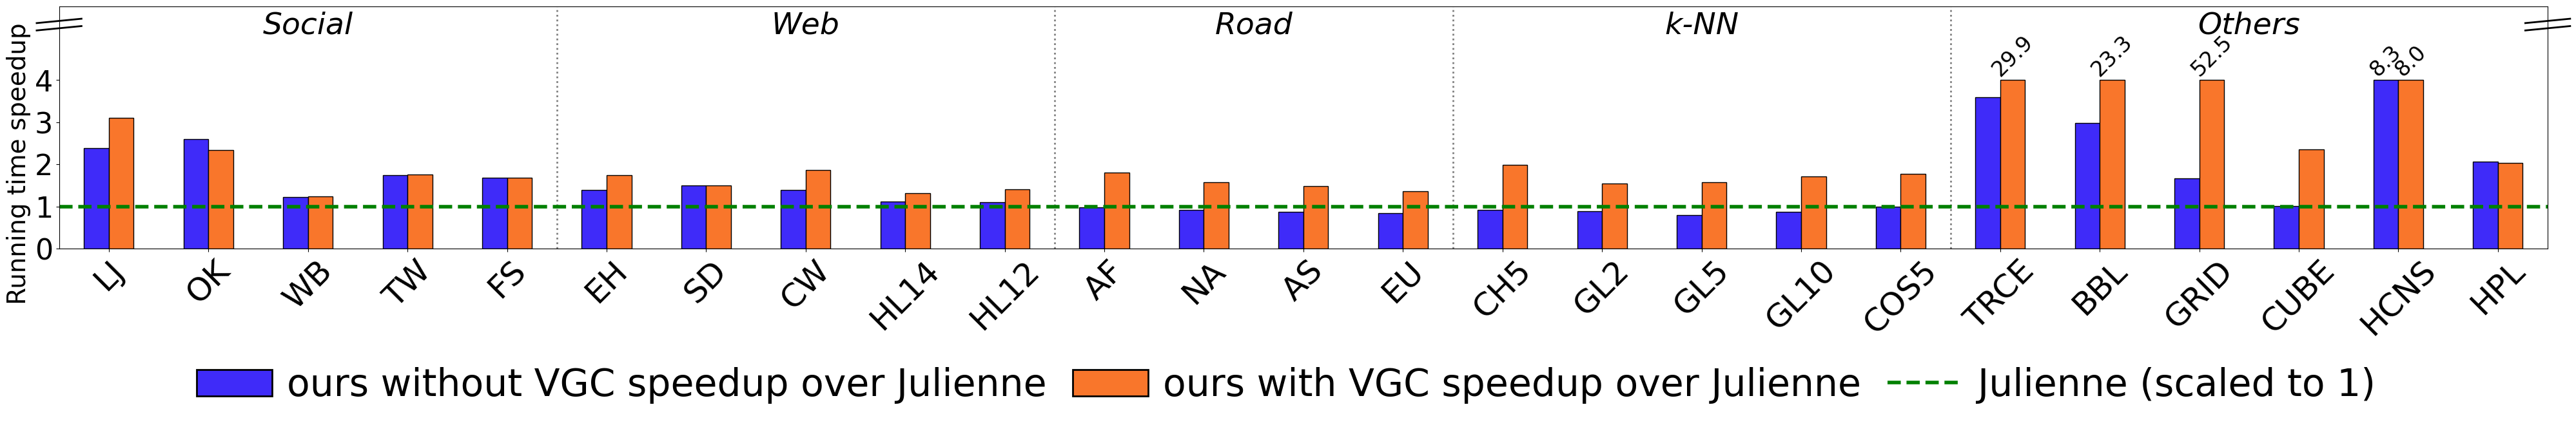

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

from matplotlib.lines import Line2D

file_path = './../../tables/span_speedup.csv'
data = pd.read_csv(file_path, keep_default_na=False)
data.columns = data.columns.str.strip()

data['NVGC speedup'] = pd.to_numeric(data['NVGC speedup'], errors='coerce')
data['VGC speedup'] = pd.to_numeric(data['VGC speedup'], errors='coerce')
data['GBBS'] = pd.to_numeric(data['GBBS'], errors='coerce')

categories = data['Category'].unique()

palette = ["#3F2BF9", "#F9762B"]

fig, ax = plt.subplots(figsize=(40, 5.5))  # Single figure

def plot_bars(ax, data_subset):
    index = 0
    bar_width = 0.25
    category_positions = []
    
    ax.set_ylim([0, 5.75])  # Adjust the y-limit as needed
    subset_categories = data_subset['Category'].unique()
    
    for category in subset_categories:
        subset = data_subset[data_subset['Category'] == category]
        category_index = np.arange(len(subset)) + index

        limited_NVGC = subset['NVGC speedup'].apply(lambda x: min(x, 4) if pd.notna(x) else x)
        limited_VGC = subset['VGC speedup'].apply(lambda x: min(x, 4) if pd.notna(x) else x)

        bars1 = ax.bar(category_index - 0.5 * bar_width, limited_NVGC, bar_width, label='NVGC speedup', color=palette[0], edgecolor='black')
        bars2 = ax.bar(category_index + 0.5 * bar_width, limited_VGC, bar_width, label='VGC speedup', color=palette[1], edgecolor='black')

        for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
            NVGC = subset.iloc[i]['NVGC speedup']
            VGC = subset.iloc[i]['VGC speedup']

            if pd.isna(NVGC):
                ax.plot(bar1.get_x() + bar1.get_width() / 2, 0.15, 'kx', markersize=20, label='_nolegend_')
            elif NVGC > 4:
                ax.text(bar1.get_x() + bar1.get_width() / 2, 4, f'{NVGC:.1f}', ha='center', va='bottom', fontsize=24, color='black', rotation=45)

            if pd.isna(VGC):
                ax.plot(bar2.get_x() + bar2.get_width() / 2, 0.15, 'kx', markersize=20, label='_nolegend_')
            elif VGC > 4: 
                ax.text(bar2.get_x() + bar2.get_width() / 2, 4, f'{VGC:.1f}', ha='center', va='bottom', fontsize=24, color='black', rotation=45)


        category_start = category_index[0] - bar_width
        category_end = category_index[-1] + bar_width
        category_midpoint = (category_start + category_end) / 2
        category_positions.append((category_start, category_end, category_midpoint))

        index += len(subset)

    ax.set_xticks(np.arange(len(data_subset)))
    ax.set_xticklabels(data_subset['Graph'], rotation=45, fontsize=36)
    # ax.set_yticklabels(np.arange(0, 12), fontsize=36)
    # ax.set_ticks(fontsize=36)
    ax.set_yticks(np.arange(0, 5, 1))
    # set y tick label font
    ax.tick_params(axis='y', labelsize=32)
    for i in range(len(category_positions) - 1):
        midpoint = (category_positions[i][1] + category_positions[i + 1][0]) / 2
        ax.axvline(x=midpoint, color='grey', linestyle=':', linewidth=2, label='_nolegend_')

    for position, category in zip(category_positions, subset_categories):
        ax.text(position[2], 0.98, category, ha='center', va='top', fontsize=34, 
                transform=ax.get_xaxis_transform(), fontstyle='italic')

    ax.set_xlim([min(np.arange(len(data_subset))) - bar_width * 2,
                 max(np.arange(len(data_subset))) + bar_width * 2])
    ax.set_ylabel('Running time speedup', fontsize=28) #bold
    label = ax.yaxis.label
    label.set_position((label.get_position()[0], label.get_position()[1] - 0.15))  # Adjust the vertical position

x_values = np.linspace(-0.5, len(data) - 0.5, len(data))  
limited_GBBS = data['GBBS'].apply(lambda x: min(x, 4) if pd.notna(x) else x)

plot_bars(ax, data)

ax.plot(x_values, limited_GBBS, linestyle='--', linewidth=4, color='green')

# Add "broken" markers at y = 4
d = 0.009  # Size of diagonal break markers
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False, linewidth=2)
ax.plot((-d, +d), (4.5 / 4.95 - d, 4.5 / 4.95 + d), **kwargs)  # Bottom-left diagonal
ax.plot((-d, +d), (4.65 / 4.95 - d, 4.65 / 4.95 + d), **kwargs)  # Bottom-left diagonal
ax.plot((1 - d, 1 + d), (4.5 / 4.95 - d, 4.5 / 4.95 + d), **kwargs)  # Bottom-right diagonal
ax.plot((1 - d, 1 + d), (4.65 / 4.95 - d, 4.65 / 4.95 + d), **kwargs)  # Bottom-right diagonal


handles = [
    # Rectangle((0, 0), 1, 1, facecolor=palette[2], edgecolor='black', linewidth=2, label='NVGC ratio over GBBS'),
    
    Rectangle((0, 0), 1, 1, facecolor=palette[0], edgecolor='black', linewidth=2, label='ours without VGC speedup over Julienne'),
    Rectangle((0, 0), 1, 1, facecolor=palette[1], edgecolor='black', linewidth=2, label='ours with VGC speedup over Julienne'),
    Line2D([0], [0], linestyle='--', linewidth=4, color='green', label='Julienne (scaled to 1)'),
    # Line2D([0], [0], marker='x', color='k', label='running time > 2000s or out of memory', markersize=24, linestyle='None', markeredgewidth=3)
]

# ax.set_title('Speedup Comparison over GBBS, PKC, and ParK', fontsize=46, pad=20)

fig.legend(
    handles=handles, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 0.05),
    fontsize=42, 
    frameon=True,
    ncol=4, 
    handletextpad=0.4,  
    columnspacing=0.7,  
    borderpad=0.4,
    edgecolor='none',
)

fig.tight_layout()
fig.savefig('./../charts/span_speedup.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()
